In [1]:
# pip install kneed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   str    
 3   Marital_Status       2240 non-null   str    
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   str    
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64  
 16 

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

Income has null values.
Handling null values

In [6]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='str')

In [9]:
#Feature Transformation
#converting year of birth to age
#Age
df["Age"] = 2026-df["Year_Birth"]

In [10]:
#converting dt_customer to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)
reference_date = df["Dt_Customer"].max()

df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [12]:
#total spending feature
df["Total_Spending"] = df['MntWines'] +df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
    
#Total children in the family by combing kids and teenagers
df["Total_children"] = df["Kidhome"]+df["Teenhome"]

In [13]:
#Education
df["Education"].value_counts()

df["Education"] = df["Education"].replace({
    "Basic":"Undergraduate",
    "2n Cycle":"Undergraduate", 
    "Graduation": "Graduate" ,
    "Master": "Postgraduate",
    "PhD": "Postgraduate"})

In [14]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [15]:
df["Marital_Status"].value_counts()

df["Living_with"] = df["Marital_Status"].replace({
    "Married" :"Partner",
    "Together":"Partner",
    "Single" :"Alone","Divorced" :"Alone","Widow" :"Alone","Absurd":"Alone","YOLO":"Alone"
})

In [16]:
df["Living_with"].value_counts()

Living_with
Partner    1444
Alone       796
Name: count, dtype: int64

In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'Total_Spending',
       'Total_children', 'Living_with'],
      dtype='str')

In [18]:
#removing unnecessary columns
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_children,Living_with
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [19]:
df.shape

(2240, 27)

In [20]:
cols = ["ID", "Year_Birth", "Marital_Status",
        "Kidhome","Teenhome","Dt_Customer"]
spending_cols = ['MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts','MntGoldProds']

cols_to_drop = cols +spending_cols
df_cleaned = df.drop(columns = cols_to_drop )

In [21]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'Total_Spending',
       'Total_children', 'Living_with'],
      dtype='str')

In [22]:
df_cleaned.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Customer_Tenure_Days', 'Total_Spending', 'Total_children',
       'Living_with'],
      dtype='str')

In [23]:
df_cleaned.shape

(2240, 15)

Detecting Outliers

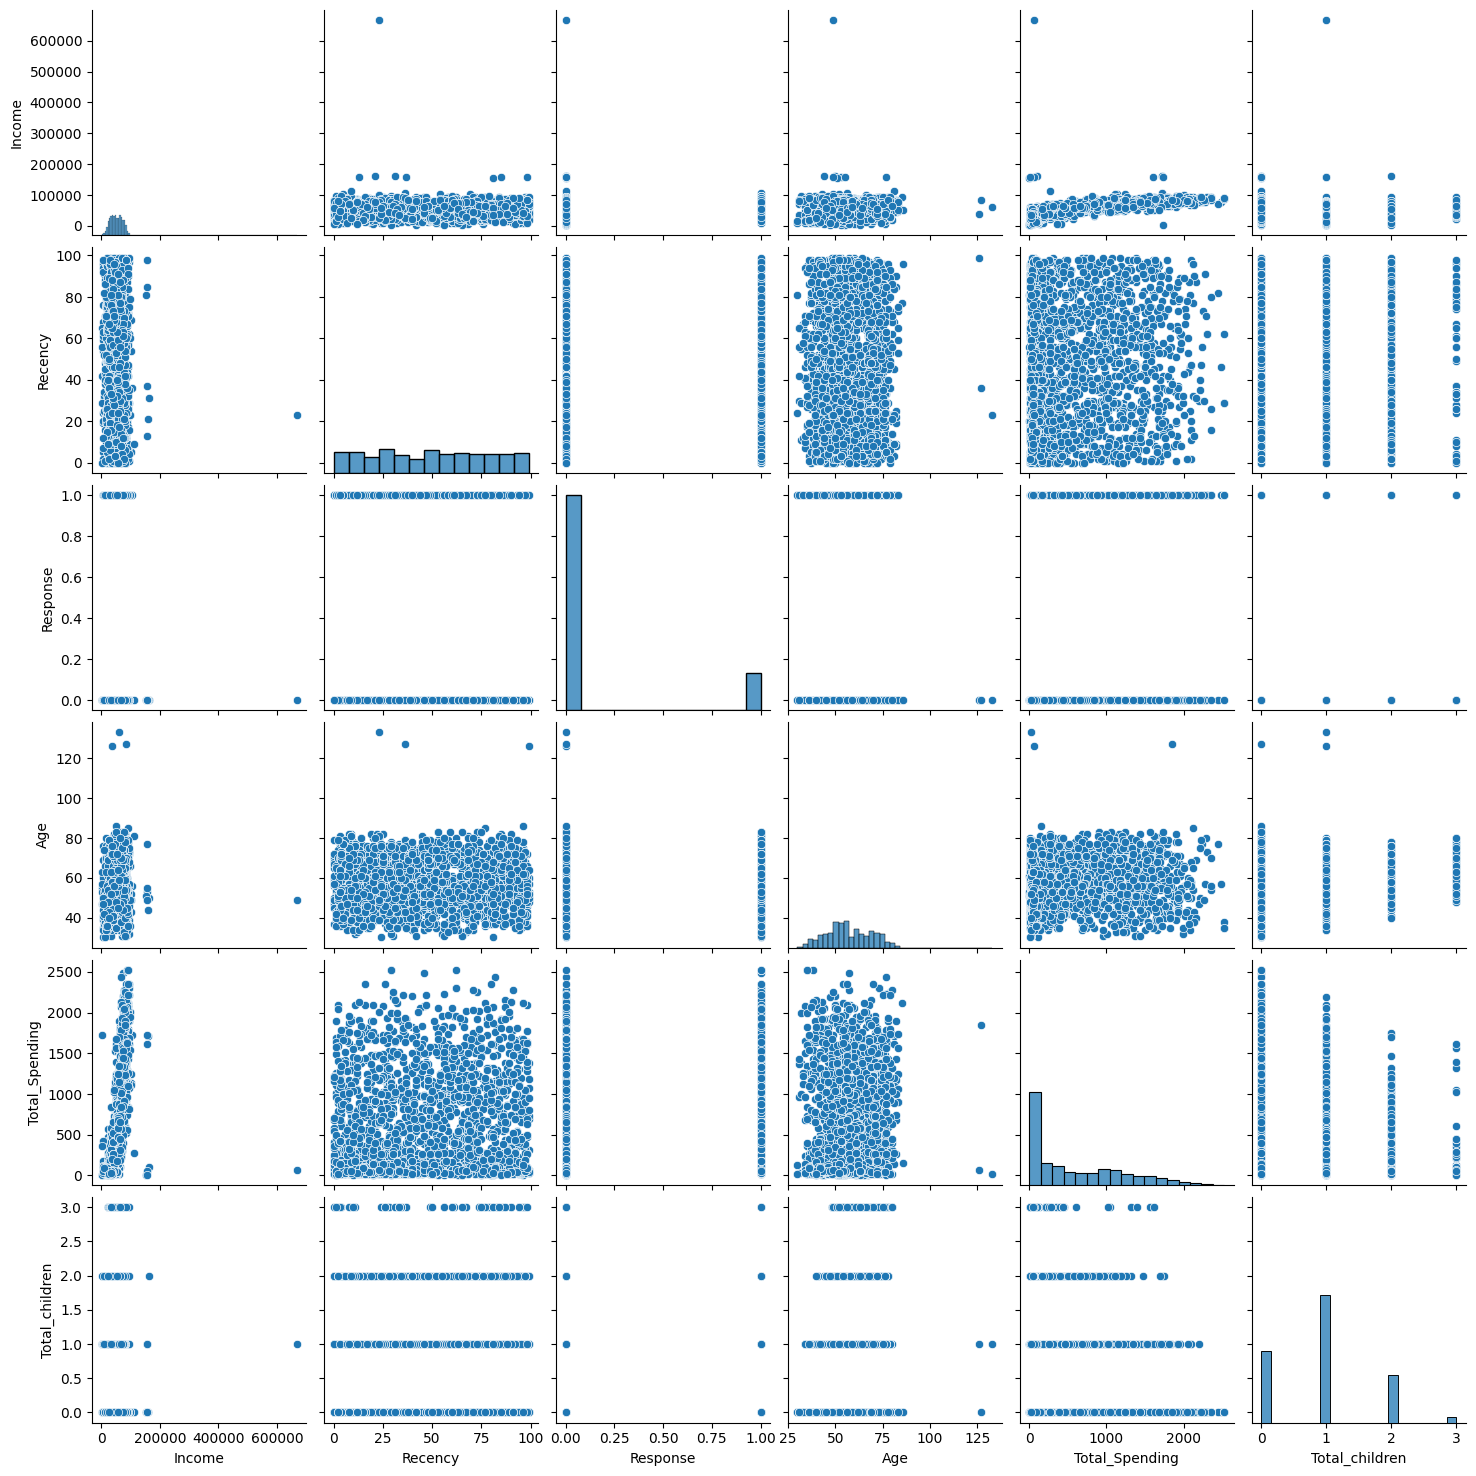

In [24]:
cols = ["Income","Recency","Response","Age","Total_Spending","Total_children"]

#relative plots of above cols
sns.pairplot(df_cleaned[cols])

There is an outlier in income and a few in age column

In [25]:
#Remove Outliers

print("Data size with outliers:",len(df_cleaned))

df_cleaned = df_cleaned[(df_cleaned["Age"])<90]
df_cleaned = df_cleaned[(df_cleaned["Income"])<600_000]

print("Data size without outliers:",len(df_cleaned))

Data size with outliers: 2240
Data size without outliers: 2236


Heatmap

In [26]:
corr = df_cleaned.corr(numeric_only = True)

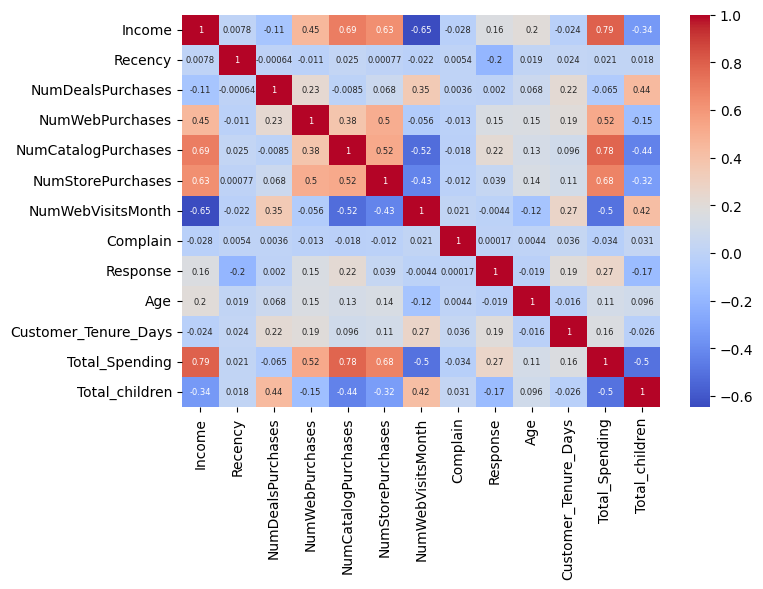

In [27]:
plt.figure(figsize = (8,6))

sns.heatmap(
    corr,
    annot = True,
    annot_kws = {"size":6},
    cmap = "coolwarm"
)
plt.tight_layout()

In [28]:
df_cleaned.shape

(2236, 15)

Encoding categorical values

In [29]:
from sklearn.preprocessing import OneHotEncoder


In [30]:
df_cleaned.dtypes

Education                   str
Income                  float64
Recency                   int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
Complain                  int64
Response                  int64
Age                       int64
Customer_Tenure_Days      int64
Total_Spending            int64
Total_children            int64
Living_with                 str
dtype: object

In [31]:
ohe = OneHotEncoder()

cat_cols = ["Education", "Living_with"]
enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [32]:
enc_df = pd.DataFrame(enc_cols.toarray(), columns = ohe.get_feature_names_out(cat_cols), index = df_cleaned.index)

In [33]:
df_encoded = pd.concat([df_cleaned.drop(columns = cat_cols) , enc_df], axis =1)

In [34]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


Scaling 

In [35]:
X = df_encoded

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
X_scaled = StandardScaler().fit_transform(X)

In [38]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74204052,  0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74204052,  0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74204052,  0.74204052]])

In [39]:
X_scaled.shape

(2236, 18)

Visualize

In [40]:
from sklearn.decomposition import PCA


In [41]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

In [42]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Text(0.5, 0, 'PCA3')

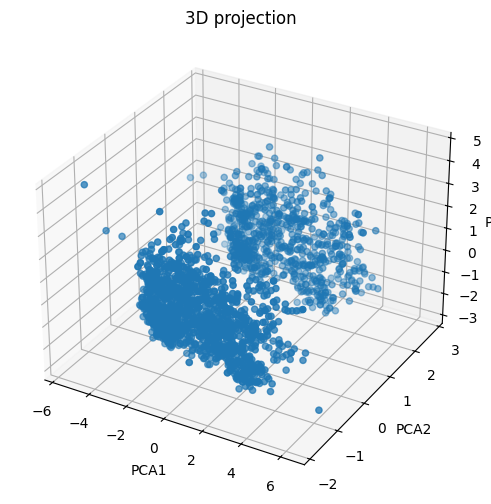

In [43]:
#plot
fig = plt.figure(figsize = (8,6))

ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_pca[:,0],  X_pca[:,1], X_pca[:,2])

ax.set_title("3D projection")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
# plt.colorbar(sc, ax = ax , label = "pca4")

In [44]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Analyze k value using elbow and shiloutte scores

In [45]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [46]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [47]:
knee = KneeLocator(range(1,15), wcss, curve = "convex", direction = "decreasing")
optimal_k = knee.elbow

In [48]:
print("best k: ", optimal_k)

best k:  5


<Axes: >

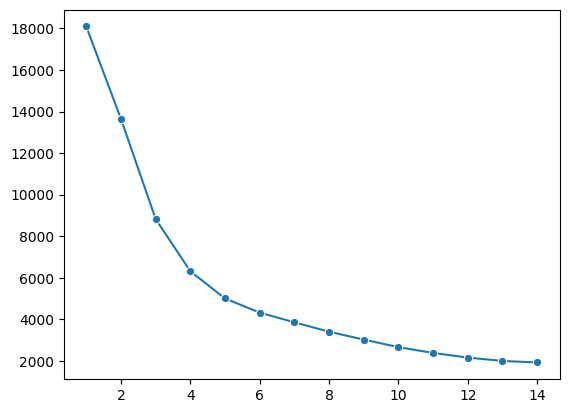

In [49]:
sns.lineplot(x = range(1,15), y = wcss, marker= "o")

Silhouette score

In [50]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'score')

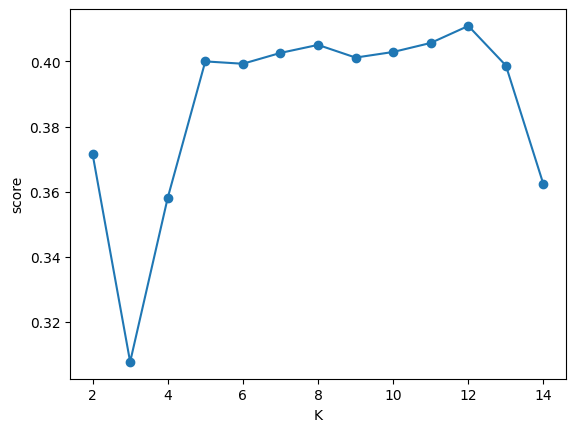

In [51]:
scores = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)
    
#plot
plt.plot(range(2,15), scores, marker = "o" )
plt.xlabel("K")
plt.ylabel("score")

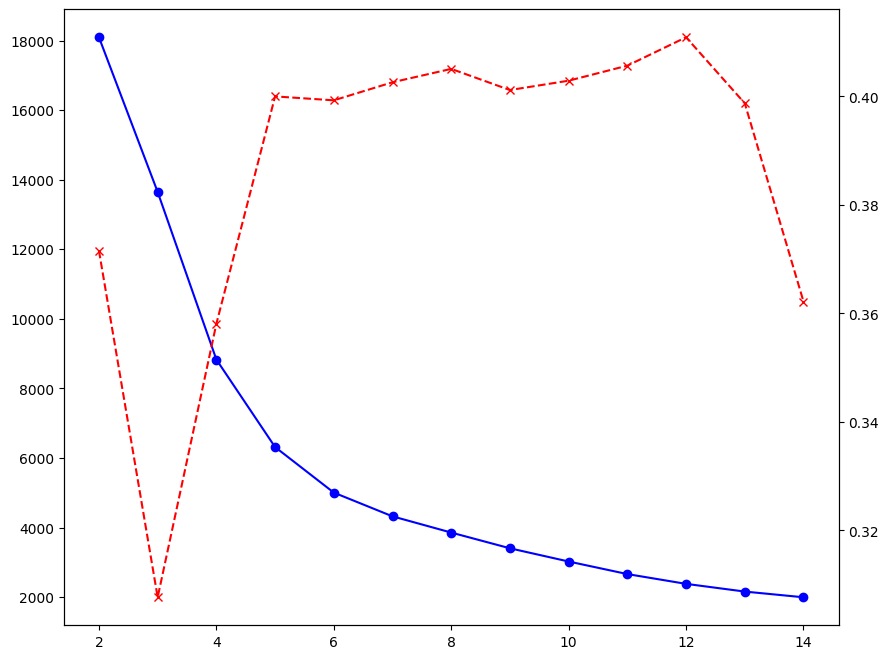

In [52]:
#combined plot
k_range = range(2,15)
fig, ax1 = plt.subplots(figsize = (10,8))
ax1.plot(k_range, wcss[:len(k_range)], marker= "o", color = "blue")
ax2 = ax1.twinx()
ax2.plot(k_range, scores, marker= "x", color = "red", linestyle = "--")

In [ ]:
#let's consider clusters = 4

In [53]:
#clustering

kmeans = KMeans(n_clusters = 4, random_state = 42)
labels_mean = kmeans.fit_predict(X_pca)

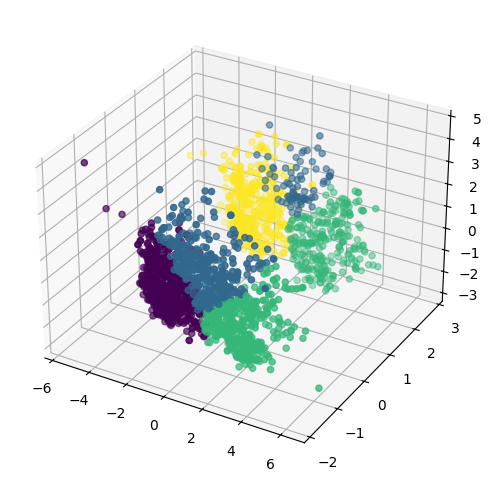

In [54]:
fig = plt.figure(figsize = (8,6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],c = labels_mean)

In [55]:
#Agglomarative clustering
from sklearn.cluster import AgglomerativeClustering

In [56]:
agg_clf = AgglomerativeClustering(n_clusters = 4, linkage = "ward" )
labels_agg= agg_clf.fit_predict(X_pca)

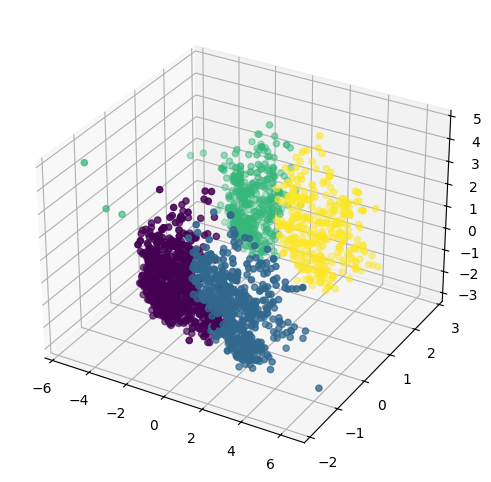

In [57]:
fig = plt.figure(figsize = (8,6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],c = labels_agg)

Characterization of Clusters

In [58]:
df_cleaned["clusters"]= labels_agg

In [59]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_children,Living_with,clusters
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone,3
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone,2
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner,1
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner,0
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner,0


<Axes: xlabel='clusters', ylabel='count'>

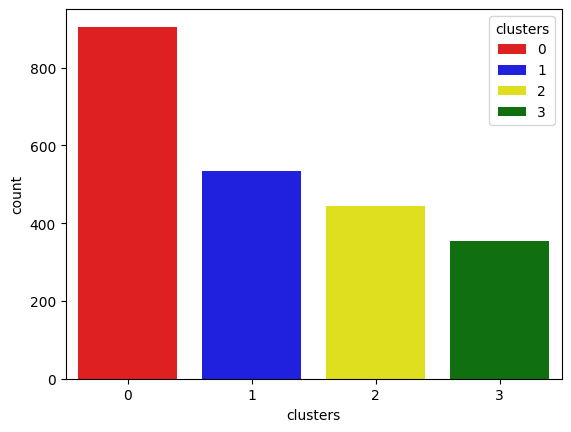

In [60]:
pal = ["red", "blue","yellow","green"]

sns.countplot(x = df_cleaned["clusters"], palette = pal, hue = df_cleaned["clusters"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

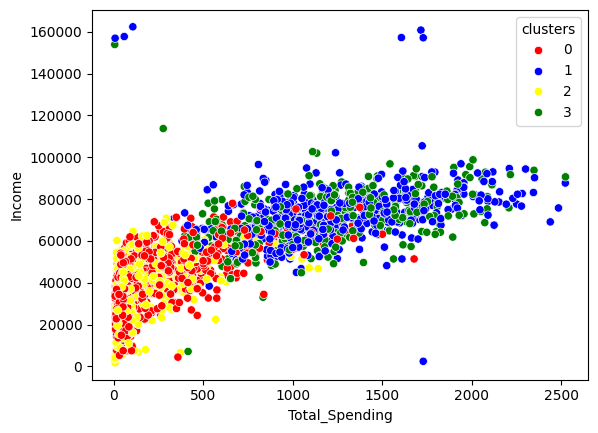

In [62]:
#Income and spending patterns
sns.scatterplot(x = df_cleaned["Total_Spending"], y = df_cleaned["Income"], hue = df_cleaned["clusters"], palette = pal)


In [63]:
X["clusters"]= labels_agg

<Axes: xlabel='clusters', ylabel='count'>

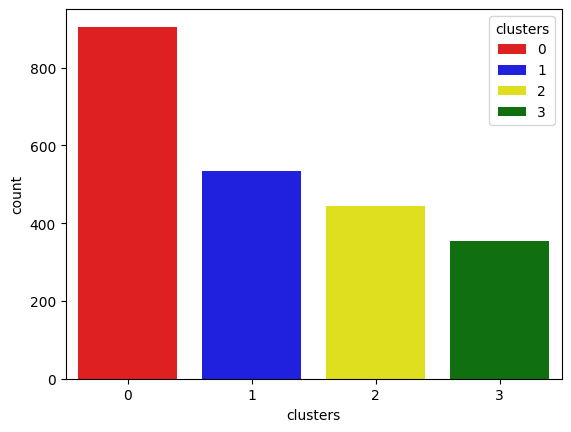

In [64]:
pal = ["red", "blue","yellow","green"]

sns.countplot(x = df_cleaned["clusters"], palette = pal, hue = df_cleaned["clusters"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

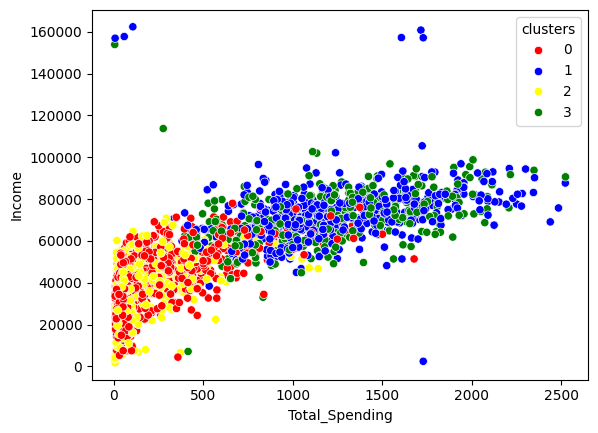

In [65]:
#Income and spending patterns
sns.scatterplot(x = df_cleaned["Total_Spending"], y = df_cleaned["Income"], hue = df_cleaned["clusters"], palette = pal)


In [66]:
#Cluster summary

cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer_Tenure_Days  Total_Spending  \
clu